<a href="https://colab.research.google.com/github/robertovazmoreira/wordcloud/blob/Analise-Sentimento/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificação de Flores

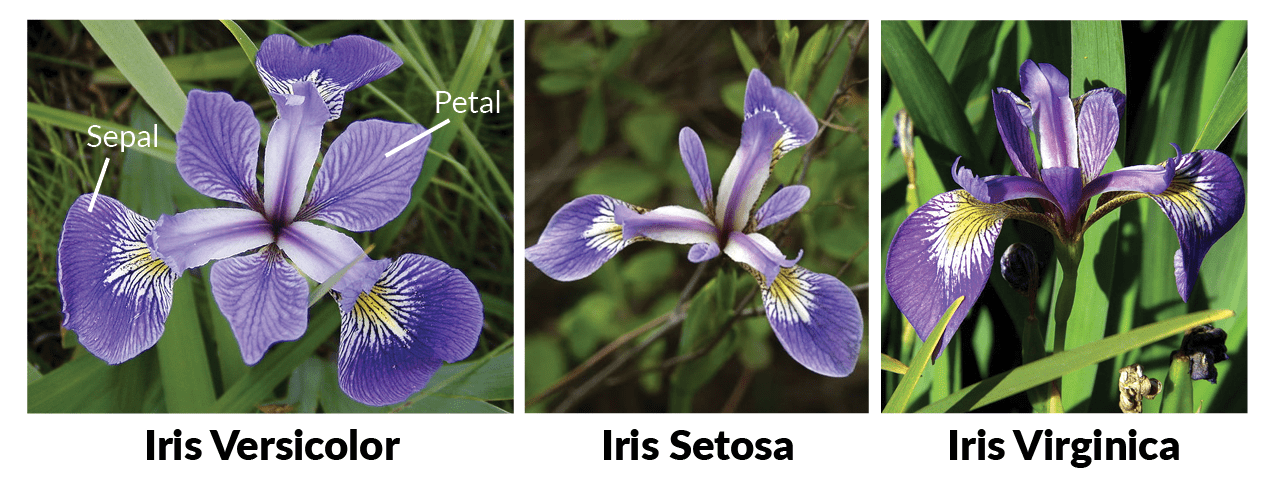

## Carregar base de Dados

In [7]:
# Importação dos pacotes
# Kaggle https://www.kaggle.com/competitions/bimaster-bi-sad-puc-rio-iris/overview
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##Análise exploratória

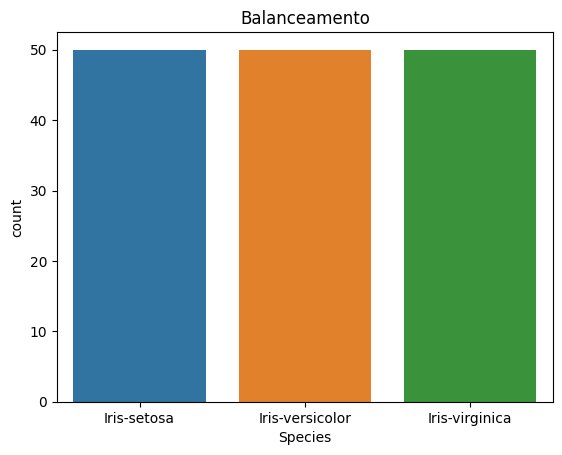

In [10]:
# Balanceamento
sns.countplot(data=data, x='Species')
plt.title('Balanceamento')
plt.show()

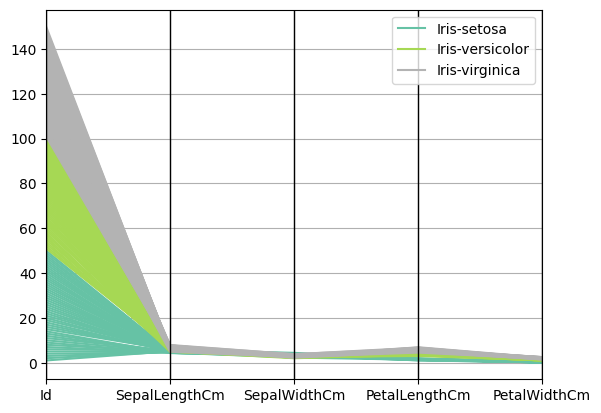

In [11]:
# https://en.wikipedia.org/wiki/Parallel_coordinates
from pandas.plotting import parallel_coordinates
parallel_coordinates(data, 'Species', colormap=plt.get_cmap("Set2"))
plt.show()

In [ ]:
# Transformar label em inteiro
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
species = encoder.fit_transform(data.Species)

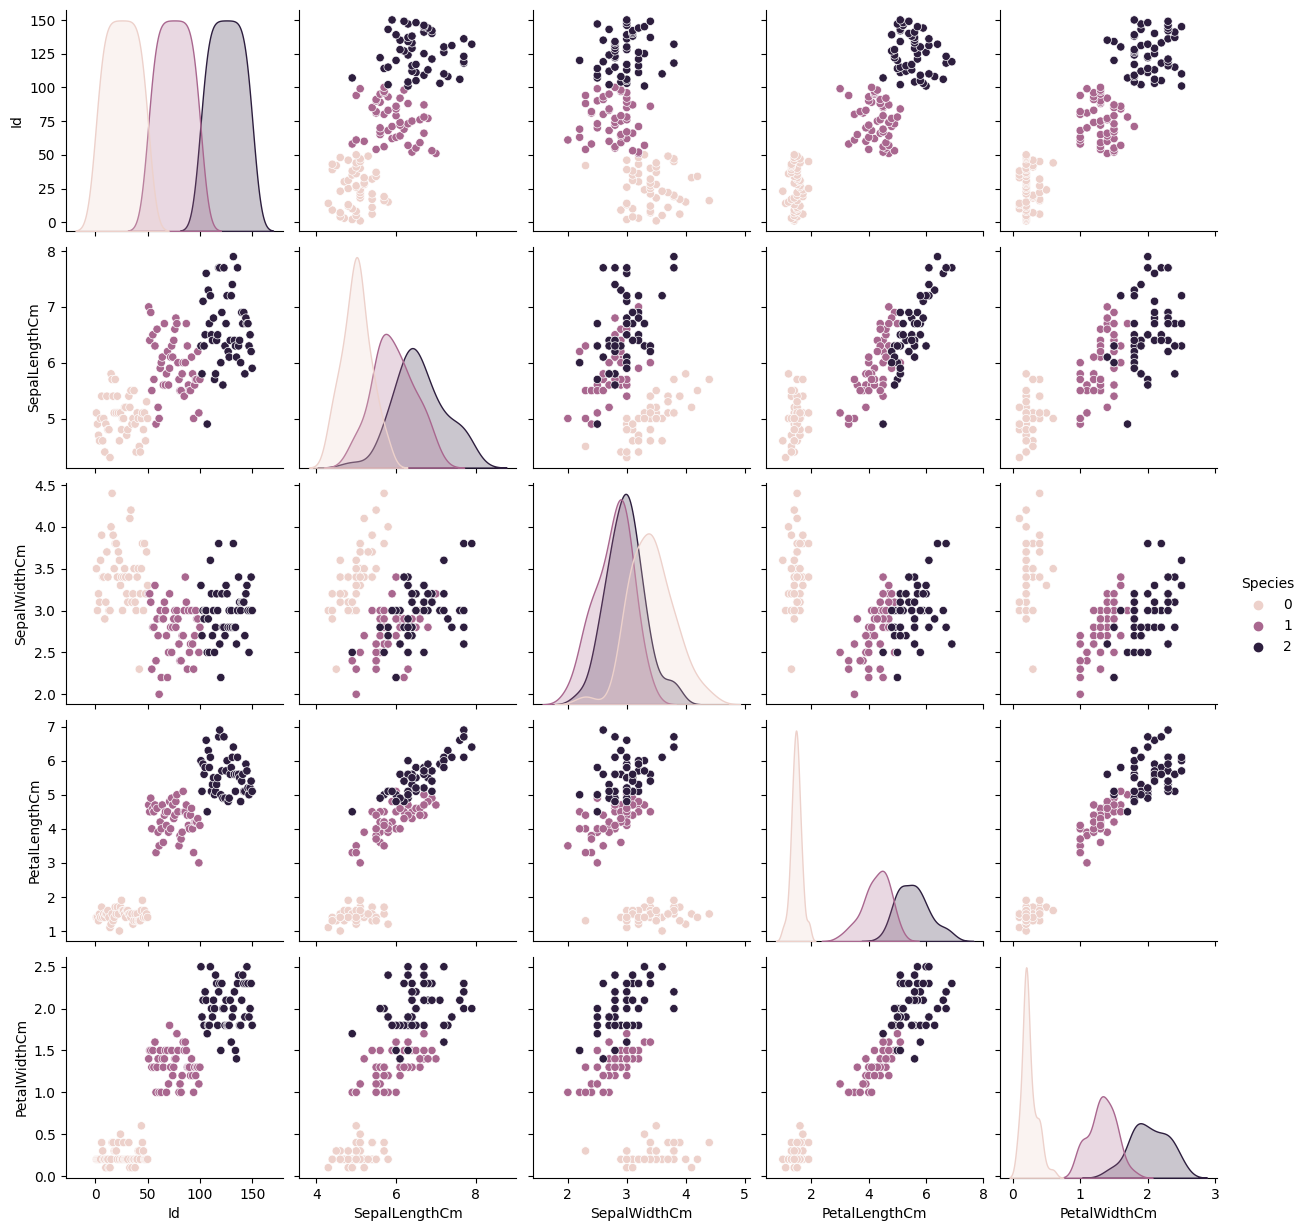

In [ ]:
temp_df = data.copy()
temp_df['Species'] = species

sns.pairplot(temp_df, hue='Species')
plt.show()

##Machine Learning

## Separar bases de treino e teste

In [ ]:
# semente para reprodução de resultados
seed=10000

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,'SepalLengthCm':'PetalWidthCm'], data['Species'], test_size=0.2, stratify=data['Species'], random_state=seed)

print('shape input de treino: ', X_train.shape)
print('shape input de teste: ', X_test.shape)
print('shape output de treino: ', y_train.shape)
print('shape output de teste: ', y_test.shape)

shape input de treino:  (120, 4)
shape input de teste:  (30, 4)
shape output de treino:  (120,)
shape output de teste:  (30,)


In [ ]:
y_train.value_counts()

Iris-versicolor    40
Iris-virginica     40
Iris-setosa        40
Name: Species, dtype: int64

In [ ]:
y_test.value_counts()

Iris-setosa        10
Iris-virginica     10
Iris-versicolor    10
Name: Species, dtype: int64

## Árvore de Decisão

In [ ]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed,max_depth=3) # tente mudar parâmetro para evitar overfitting "max_depth";"min_samples_leaf"
model.fit(X_train, y_train);

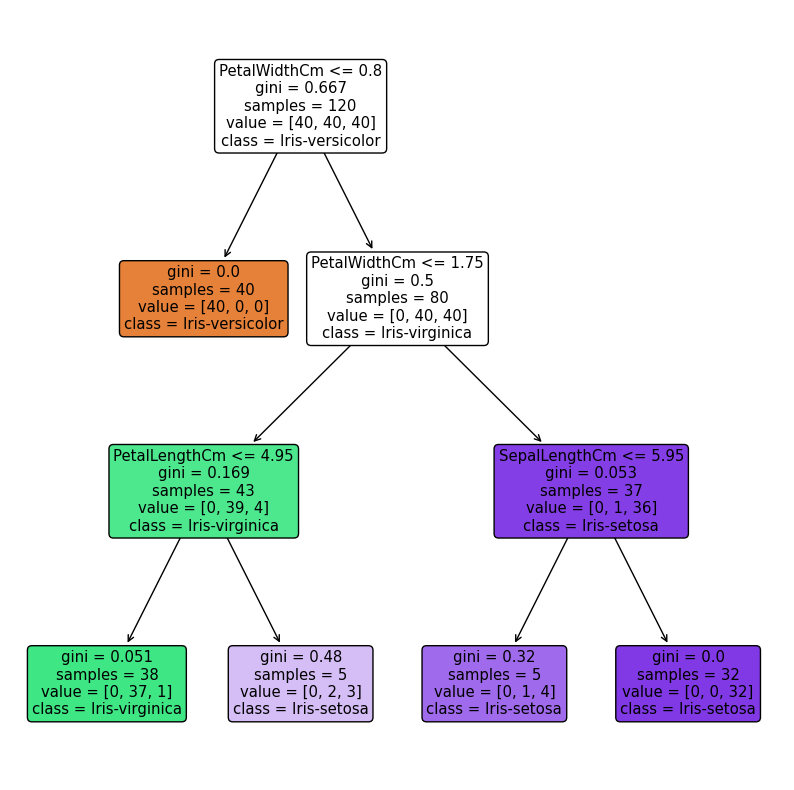

In [ ]:
# Visualização gráfica da árvore de decisão
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10)) # Definir tamanho da imagem a ser gerada
tree.plot_tree(model, feature_names=X_train.columns, class_names=y_train.unique(), filled=True, rounded=True); # plota a árvore

In [ ]:
# métrica de treino
model.score(X_train, y_train)

0.9666666666666667

In [ ]:
# Avaliar modelo treinado na base de teste
model.score(X_test, y_test) # acurácia

1.0

In [ ]:
y_pred = model.predict(X_test) #inferência do teste

In [ ]:
import numpy as np
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequência:")
print(np.asarray((unique_elements, counts_elements)))

Frequência:
[['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
 [10 10 10]]


In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_pred, y_test)
pd.DataFrame(confMatrix, index=['Previsto Setosa', 'Previsto Versicolor', 'Previsto Virginica'], columns=['Real Setosa', 'Real Versicolor', 'Real Virginica'])

,Real Setosa,Real Versicolor,Real Virginica
Previsto Setosa,10,0,0
Previsto Versicolor,0,10,0
Previsto Virginica,0,0,10


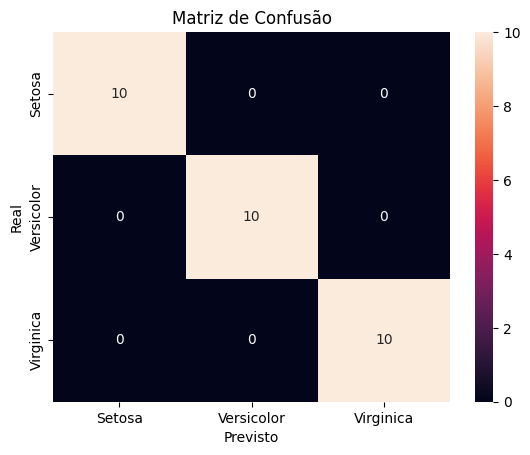

In [ ]:
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')

# Colocar os nomes
ax.xaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginica'])
ax.yaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginica'])
plt.show()

In [ ]:
### Visualizar Exemplo Resposta

data_exemplo = pd.read_csv('exemplo_resposta.csv')
data_exemplo.head()





FileNotFoundError: ignored

In [ ]:

df_resposta = pd.read_csv('Iris_teste_sem_rotulo.csv')
df_resposta.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,151,5.1,3.5,1.4,0.2
1,152,4.9,3.0,1.4,0.2
2,153,4.7,3.2,1.3,0.2
3,154,4.6,3.1,1.5,0.2
4,155,5.0,3.6,1.4,0.2


In [ ]:
df_resposta.loc[:,'SepalLengthCm':]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:


y_pred = model.predict(df_resposta.loc[:,'SepalLengthCm':]) #inferência do teste

In [ ]:
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
df_resposta['Species']=y_pred


In [ ]:


df_to_kaggle = df_resposta[["Id", "Species"]]
df_to_kaggle.head()

,Id,Species
0,151,Iris-setosa
1,152,Iris-setosa
2,153,Iris-setosa
3,154,Iris-setosa
4,155,Iris-setosa


In [ ]:
df_to_kaggle.to_csv('iris_to_kaggle.csv',index=False)